# Week 13. In-Class Practice
## 修真聊天群的 word2vec 實作
本文參考[自然語言處理入門- Word2vec小實作](https://medium.com/pyladies-taiwan/%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86%E5%85%A5%E9%96%80-word2vec%E5%B0%8F%E5%AF%A6%E4%BD%9C-f8832d9677c8)進行詞向量實作應用

In [1]:
import jieba
import numpy as np
import gensim
import warnings
from ipywidgets import IntProgress
from hanziconv import HanziConv
from IPython.display import display
warnings.filterwarnings("ignore")

In [2]:
file_train_read = []
with open('./dataset/xiuzhenliaotianqun.txt', encoding='utf-8') as file_train_raw:
    for line in file_train_raw:
        if line.strip() != '':
            file_train_read.append(HanziConv.toTraditional(line.strip()))

print("Text lines:", len(file_train_read))

Text lines: 213871


In [3]:
stopwords = set()
with open('./dataset/stopwords.txt', encoding='utf-8') as stopword_file:
    for words in stopword_file:
        stopwords.add(HanziConv.toTraditional(words.strip()))

print("Stopwords number:", len(stopwords))

Stopwords number: 745


### 斷詞與word2vec實現
### 1. 進行斷詞

In [4]:
progress = IntProgress(min=0, max=len(file_train_read))
progress.value = 0
progress.description = "[ %s / %s ]"%(str(progress.value), str(progress.max))
display(progress)

file_train_seg = []
for i in range(len(file_train_read)):
    file_train_seg.append([' '.join([word for word in jieba.cut(file_train_read[i], cut_all=False)
                                            if word not in stopwords])])
    progress.value +=1
    progress.description = "[ %s / %s ]"%(str(progress.value), str(progress.max))

IntProgress(value=0, description='[ 0 / 213871 ]', max=213871)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Kevin\AppData\Local\Temp\jieba.cache
Loading model cost 0.922 seconds.
Prefix dict has been built succesfully.


In [5]:
# 將 jieba 的斷詞產出存檔
file_seg_word_done_path = 'corpus_seg_done.txt'
with open(file_seg_word_done_path, 'wb') as f:
    for i in range(len(file_train_seg)):
        f.write((file_train_seg[i][0] + '\n').encode('utf-8'))

# 檢視斷詞 jieba 的結果
def print_list_chinese(list):
    for i in range(len(list)):
        print(list[i])
        
print_list_chinese(file_train_seg[3])

季節 江南 地區 晝夜 溫差 變 很大 白天 還穿 褲衩 熱成 狗 晚上 縮 窩 裏 凍成 寒號 鳥


### 2. word2vec 轉成高維空間向量

In [6]:
# jieba分詞轉 word2vec 向量
from gensim.models import word2vec
sentences = word2vec.LineSentence(file_seg_word_done_path)
model = word2vec.Word2Vec(sentences, size=250)
model.save("word2vec.model")

In [7]:
# 可以用 model.wv.syn0 檢視詞向量，因為一個詞有250個維度，全部列出過於冗長.....
# 這邊僅僅呈現 10 個詞的 10 個維度

model.wv.syn0[0:10,0:10]

array([[ 0.04239118,  2.2368786 ,  0.30990183, -0.08359413, -1.0853539 ,
         0.0759657 , -0.23383838,  0.3426413 ,  0.18601863, -0.5962879 ],
       [ 0.2396643 ,  0.11543863, -0.32107928,  0.2733872 , -2.210506  ,
        -0.24299635, -0.8398925 ,  0.42983028,  0.06868538,  0.03340372],
       [-0.21449733, -0.19465223,  0.24281439,  2.0364785 ,  0.43886843,
        -0.6746982 ,  0.39290628,  0.3287636 , -0.08788708,  1.498413  ],
       [ 1.1003132 ,  0.7388448 , -0.06538768,  1.5955142 , -0.45680928,
         1.3649564 ,  0.40499634,  0.12498713,  0.40499213, -0.54926616],
       [ 0.18385495,  0.87436664,  0.7310566 , -1.3061672 ,  0.16058248,
         0.53631353, -0.20152706, -1.1882176 , -0.40539148, -0.7878539 ],
       [ 0.4087804 ,  1.154071  ,  0.28252983,  0.6422841 , -0.39542902,
         2.339106  , -0.74904156,  0.2211862 , -0.40371832,  0.59000033],
       [-0.62723345, -0.763722  ,  1.3520223 , -0.27305758,  0.29744628,
         0.5772125 ,  1.0707628 , -1.5199472 

In [8]:
# 可檢視第 996~1000 個字詞是什麼

for i in range(995,1000):
    print(model.wv.index2word[i])

高升
丹藥
起身
路
盔甲


### 評價所建「詞向量」的好壞

In [9]:
# 顯示空間距離相近的詞
print("宋書航 相近詞：", [i[0] for i in model.similar_by_vector('宋書航')], '\n')
print("修真 相近詞：", [i[0] for i in model.similar_by_vector('修真')], '\n')
print("法術 相近詞：", [i[0] for i in model.similar_by_vector('法術')], '\n')

# 顯示相近詞和詞向量，直接使用 similar_by_vector() 就可以了
model.similar_by_vector('宋書航')

宋書航 相近詞： ['書航', '瞭書航', '宋航', '赤瞳', '將書航', '著書航', '那書航', '小彩', '葉思', '瞭宋書航'] 

修真 相近詞： ['資料', '本次', '轉職', '加入', '臨時', '設定', '權限', '簡化', '詳細', '丹方'] 

法術 相近詞： ['催眠', '道術', '能力', '技能', '天賦', '秘法', '強力', '小法術', '秘術', '術'] 



[('書航', 0.6561259031295776),
 ('瞭書航', 0.5809797048568726),
 ('宋航', 0.5807603001594543),
 ('赤瞳', 0.5756723880767822),
 ('將書航', 0.5499818325042725),
 ('著書航', 0.4900533854961395),
 ('那書航', 0.48526012897491455),
 ('小彩', 0.4827609956264496),
 ('葉思', 0.4780072569847107),
 ('瞭宋書航', 0.476456880569458)]

回過頭來看一下詞向量模型的結果。

首先我們用咱們男主角的名字「宋書航」丟進去測試，原則上要跑出一些主線人物的名字，畢竟他們伴隨著男主角成長，比較可能存在類似的脈絡中而被模型捕捉到。乍看也還算合理，不過「瞭書航」、「著書航」這二個詞很明顯地就是由簡轉繁引發的斷詞失誤了。

第二個嘗試看看「修真」的相近詞，跑出來「資料」、「權限」、「共享」等詞彙，再度懷疑是斷詞引擎或者詞向量模型出了問題。其實不然，有看過這部小說的同學就會知道這部作品是多麼的不(ㄋㄠˇ) 落(ㄉㄨㄥˋ) 俗(ㄉㄚˋ) 套(ㄎㄞ)。這個例子再度告訴我們，Domain Knowledge 的重要性啊 XDDD。

最後看看「法術」的相近詞，嗯，終於合乎我們的預期。這些字詞都是玄幻修真類小說的常用語彙，成功～

---------

不過還有一個小麻煩，同樣關乎斷詞引擎的失誤，就是當我們輸入一個很重要的角色「白前輩」進去搜尋相近詞時，居然找不到！

In [10]:
model.similar_by_vector('白前輩')

KeyError: "word '白前輩' not in vocabulary"

這邊我們有兩個問題要修正，一是關於簡轉繁後的判讀失誤，二是人名的錯誤斷詞。第一個問題，我們可以先讓斷詞引擎斷完，我們再翻譯語料庫中的詞彙。第二個問題我們則要加入相關字詞的字庫來調整斷詞。

------
### 修正文本
這邊直接導入文本，不做繁簡體的轉換。

In [11]:
file_train_read = []
with open('./dataset/xiuzhenliaotianqun.txt', encoding='utf-8') as file_train_raw:
    for line in file_train_raw:
        if line.strip() != '':
            file_train_read.append(line.strip())

print("Text lines:", len(file_train_read))

Text lines: 213871


In [12]:
stopwords = set()
with open('./dataset/stopwords.txt', encoding='utf-8') as stopword_file:
    for words in stopword_file:
        stopwords.add(words.strip())

print("Stopwords number:", len(stopwords))

Stopwords number: 746


### 建立字典
我們從百度上面透過爬蟲抓了一些關鍵字(角色名稱、事物)當作分詞的辭典，加強斷詞的效果。

In [13]:
import sys
sys.path.insert(0, "../modules")
import wenwenbaidu as wwbd

dictwords = set(wwbd.get_keywords())
dictwords.add('白前辈')
print(dictwords)

for i in dictwords:
    jieba.add_word(i)
    jieba.suggest_freq(i, tune=True)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Kevin\AppData\Local\Temp\jieba.cache


{'始祖）', '修真聊天群', '霸霸', '作品：', '九洲一号群', '五品灵皇', '醉月居士', '捉妖人长生者', '荔枝仙子', '御剑飞行', '千年第二玄（怂）圣', '破阳戟郭大', '隐藏于历史中的巫法祭坛', '石巨人', '活泉', '霸巫', '四品先天', '二维码', '恒火真君', '白鹤真君', '宋木头/', '空间天赋', '灵蝶圣君', '黑皮羽柔子', '诸神学徒', '永不陷落的圣城', '品真君', '七生符府主', '雷火', '田甜副岛主', '叶思', '八品玄圣', '楚阁主', '“伪不朽烟雾状态·极限弱化版”', '程琳的女儿', '霸宋', '复活', '钢铁化身', '古魔灵力', '金莲空间', '蜃能', '天雷猪', '程琳', '长生之道', '第二刀意：', '伪不朽烟雾状态·极限弱化版', '宋壹', '东', '赤霄子', '下阶灵鬼', '白玄圣', '丹成无悔', '琉璃', '无龙纹', '流萤仙子', '虚丹', '田天岛主', '【那为世界带来终焉的圣剑】', '邪莲空间', '莲花虚影', '玄女门云雀子', '虚幻的真实，', '复仇印记', '上阶灵鬼', '【被连接的世界】', '感情路线', '何止魔帝', '小白，待你长发及腰，嫁我可好？', '北河散人', '斑纹龙two', '儒门圣人', '大道', '本心', '五', '落尘真君', '【隐藏于历史中的巫法祭坛】', '我那放荡不羁的人生', '天劫世界', '江紫烟', '铁卦算仙', '其他', '霸儒', '云游僧通玄', '琉璃书生', '喜欢宋书航', '灭凤公子', '北方大帝', '羽柔子', '暴力路线', '白前辈', '楚阁主two', '紫金丹', '霸龙', '针针计较', '笔名：', '起点中文网', '本命法器', '魔前显身', '特点：', '功德之力', '白龙姐姐（金龙始祖）', '七', '第一幻象：', '科学系能源', '蛟霸真君', '大罗教雨月真君', '心魔劫', '永不平息的暴怒残阳', '实金丹', '逆鲸武士', '第一刀意', '造化仙子（此为戏称，真名未知）', '造化法王', '海胆战士二十年义务教育教科书', '金丹', '第三幻象', '九层

Loading model cost 0.942 seconds.
Prefix dict has been built succesfully.


In [14]:
progress = IntProgress(min=0, max=len(file_train_read))
progress.value = 0
progress.description = "[ %s / %s ]"%(str(progress.value), str(progress.max))
display(progress)

# 用 jieba 斷詞
file_train_seg = []
for i in range(len(file_train_read)):
    file_train_seg.append([' '.join([word for word in jieba.cut(file_train_read[i], cut_all=False)
                                            if word not in stopwords])])
    progress.value +=1
    progress.description = "[ %s / %s ]"%(str(progress.value), str(progress.max))
    
# 將 jieba 的斷詞產出存檔
file_seg_word_done_path = 'corpus_seg_done.txt'
with open(file_seg_word_done_path, 'wb') as f:
    for i in range(len(file_train_seg)):
        f.write((file_train_seg[i][0] + '\n').encode('utf-8'))

IntProgress(value=0, description='[ 0 / 213871 ]', max=213871)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [15]:
# 檢視斷詞 jieba 的結果
def print_list_chinese(list):
    for i in range(len(list)):
        print(list[i])
        
print_list_chinese(file_train_seg[3])

季节 江南地区 昼夜 温差 变 很大 白天 穿 裤衩 热成 狗 晚上 缩 被窝 里 冻成 寒号鸟


In [16]:
# jieba分詞轉 word2vec 向量
from gensim.models import word2vec
sentences = word2vec.LineSentence(file_seg_word_done_path)
model = word2vec.Word2Vec(sentences, size=250)
model.save("word2vec.model")

### 重新分詞後的詞向量
這次的結果就顯得比較合理，沒有出現奇怪的字詞。

In [17]:
# 顯示空間距離相近的詞
print("宋書航 相近詞：", [i[0] for i in model.similar_by_vector('宋书航')], '\n')
print("修真 相近詞：", [i[0] for i in model.similar_by_vector('修真')], '\n')
print("法術 相近詞：", [i[0] for i in model.similar_by_vector('法术')], '\n')

宋書航 相近詞： ['书航', '宋航', '赤瞳', '苏氏阿十六', '十六', '将书航', '楚康伯', '小彩', '黄山尊者', '葱娘'] 

修真 相近詞： ['资料', '设定', '修真界', '知识', '生活', '详细', '涉及', '冒险', '仪式', '联盟'] 

法術 相近詞： ['道术', '秘术', '幻术', '能力', '效果', '起到', '类', '漫步', '治愈', '催眠'] 



### 將距離相近的詞以視覺化呈現
我們可以試著把小說裡面的角色，利用 PCA 降維至平面上然後進行視覺化。

In [18]:
print("九州一號群內角色：\n")
print("苏氏阿十六 相近詞：", [i[0] for i in model.similar_by_vector('苏氏阿十六')], '\n')
print("羽柔子 相近詞：", [i[0] for i in model.similar_by_vector('羽柔子')], '\n')
print("白前辈 相近詞：", [i[0] for i in model.similar_by_vector('白前辈')], '\n')
print("黄山尊者 相近詞：", [i[0] for i in model.similar_by_vector('黄山尊者')], '\n')

print("\n(遭懟)大佬：\n")
print("白前辈two 相近詞：", [i[0] for i in model.similar_by_vector('白前辈two')], '\n')
print("胖球 相近詞：", [i[0] for i in model.similar_by_vector('胖球')], '\n')
print("天帝 相近詞：", [i[0] for i in model.similar_by_vector('天帝')], '\n')

print("\n其他人物：\n")
print("程琳 相近詞：", [i[0] for i in model.similar_by_vector('程琳')], '\n')
print("琉璃书生 相近詞：", [i[0] for i in model.similar_by_vector('琉璃书生')], '\n')

九州一號群內角色：

苏氏阿十六 相近詞： ['十六', '鱼娇娇', '黑皮羽柔子', '诗', '七生符府主', '宋航', '三人', '小彩', '羽柔子', '黄山尊者'] 

羽柔子 相近詞： ['黑皮羽柔子', '十六', '鱼娇娇', '苏氏阿十六', '江紫烟', '九灯', '叶思', '荔枝仙子', '阿爹', '宋妈妈'] 

白前辈 相近詞： ['白前辈two', '本尊', '分身', 'ｏ', '白鹤真君', '白', '楚阁主', '本体', '女士', '十六'] 

黄山尊者 相近詞： ['七生符府主', '献公居士', '七修圣君', '东方六仙子', '黄山真君', '荔枝仙子', '娇娇', '流萤仙子', '落尘真君', '灵蝶圣君'] 


(遭懟)大佬：

白前辈two 相近詞： ['九幽白', '我主', '白前辈', '女士', '清楚', '献公居士', 'to', '理由', '恒火真君', '楚阁主'] 

胖球 相近詞： ['球', '怼', '遗蜕', '九幽球', '小号', '大佬', '液态', '连九幽', '金属', '天道'] 

天帝 相近詞： ['主人', '契约', '灵鬼', '金龙', '始祖', '何止魔帝', '北方大帝', '程琳', '楚阁主', '魔帝'] 


其他人物：

程琳 相近詞： ['金龙', '货都', '转世', '昆', '圆圆', '六修', '天帝', '始祖', '签下', '而灵'] 

琉璃书生 相近詞： ['舍蓝', '枯荣', '坛主', '发光', '那具', '遥遥', '金童玉女', '千手', '双树', '强借'] 



In [19]:
from sklearn.decomposition import PCA

main_characters = ['宋书航', '苏氏阿十六', '黄山尊者', '白前辈two', '胖球', '天帝', '程琳']
word_list = []
similar_num = 5
for person in main_characters:
    word_list.append(person)
    word_list = word_list + [i[0] for i in model.similar_by_vector(person)][:similar_num]

In [20]:
word_vectors = model.wv[word_list]
word_vectors.shape

(42, 250)

In [21]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)
reduced_vectors.shape

(42, 2)

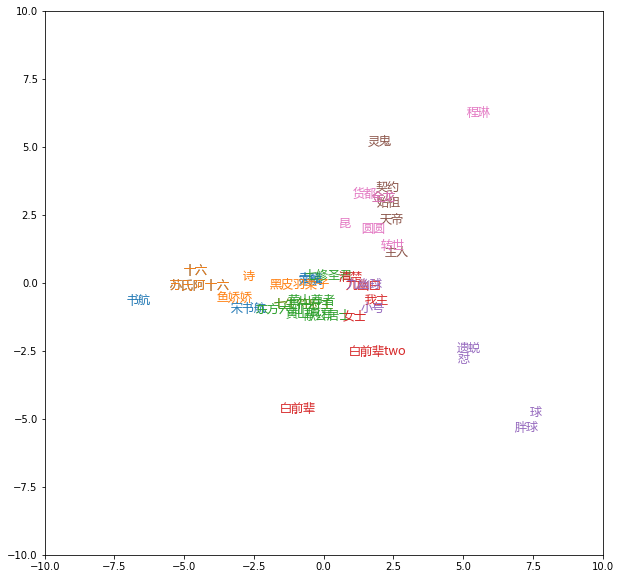

In [22]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
font = FontProperties(fname = r"C:\Windows\Fonts\msyh.ttc")

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
for i in range(len(main_characters)):
    text_color = 'C' + str(i)
    for j in range(i*6, i*6+similar_num+1):
        ax.annotate(word_list[j], xy=reduced_vectors[j,:], color=text_color, fontsize=12, fontproperties=font)
plt.show()

如果有看過這部小說的人，大致可以透過降維後的視覺化，發現詞向量的合理。九州一號群分布於座標軸的左半部分(黃山尊者在中間真不愧是群主)，九幽界的大佬們在右下半部，天庭相關的角色分布於右上半部。有興趣的人可以試著玩玩看其他的文本~~

#